In [29]:

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
import seaborn as sns

#import category_encoders as ce


%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [30]:
df_feature = pd.read_csv('clean_data.csv',index_col=0)
df_test = pd.read_csv('test_clean_data.csv')
df_score = pd.read_csv('score.csv')


In [31]:
df_feature.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,gender_code,region_category_code,membership_category_code,year,joined_through_referral_code,preferred_offer_types_code,medium_of_operation_code,internet_option_code,used_special_discount_code,offer_application_preference_code,past_complaint_code,complaint_status_code,feedback_code
0,18,17,300.63,53005.25,781.75,0,2,3,4,1,1,0,2,1,1,0,1,4
1,32,16,306.34,12838.38,641.22,0,0,4,4,0,1,2,1,1,0,1,2,5
2,44,14,516.16,21027.00,500.69,0,1,2,5,2,1,2,2,0,1,1,3,3
3,37,11,53.27,25239.56,567.66,1,0,2,5,2,1,2,1,0,1,1,4,3
4,31,20,113.13,24483.66,663.06,0,0,2,4,1,0,3,1,0,1,1,2,3


In [32]:
df_score.head()

,churn_risk_score
0,2
1,1
2,5
3,5
4,5


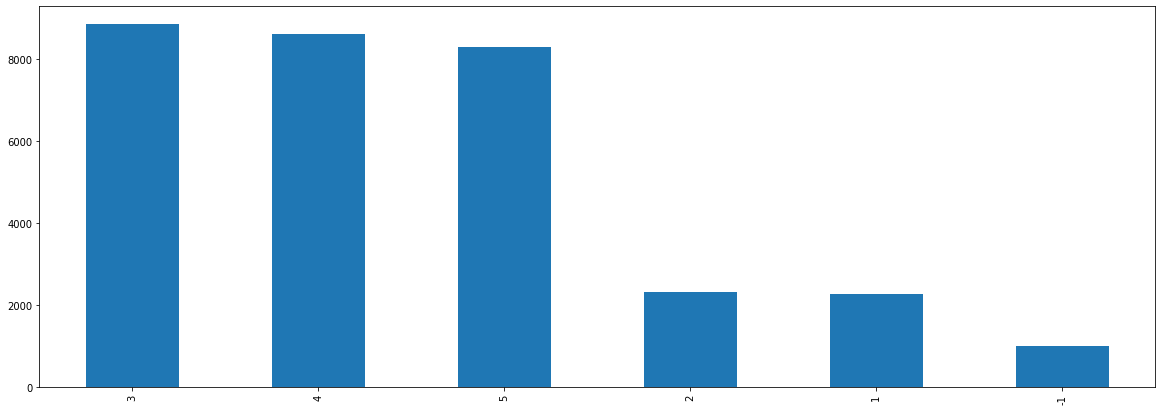

In [33]:
plt.figure(figsize=(20,7))
df_score["churn_risk_score"].value_counts().plot.bar()
plt.show()

In [34]:
df_feature.dtypes

age                                    int64
days_since_last_login                  int64
avg_time_spent                       float64
avg_transaction_value                float64
points_in_wallet                     float64
gender_code                            int64
region_category_code                   int64
membership_category_code               int64
year                                   int64
joined_through_referral_code           int64
preferred_offer_types_code             int64
medium_of_operation_code               int64
internet_option_code                   int64
used_special_discount_code             int64
offer_application_preference_code      int64
past_complaint_code                    int64
complaint_status_code                  int64
feedback_code                          int64
dtype: object

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# Plotting The Correlations between all the features
#corrmat = df_feature.corr()
#top_corr_features = corrmat.index
#plt.figure(figsize=(20,20))
#sns.heatmap(df_feature[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [37]:
X_train, X_val, y_train, y_val = train_test_split(df_feature,df_score,test_size=0.05, random_state = 42,stratify=df_score)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(29758, 18)
(29758, 1)
(1567, 18)
(1567, 1)


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [40]:
mean = np.mean(X_train)
std = np.std(X_train)
std


0.9999999999999999

In [41]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)

/var/folders/tq/ptz_s_t91w34mmgp0vwxsq3h0000gn/T/ipykernel_15090/760754594.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_train,y_train)


RandomForestClassifier()

In [42]:
y_pred = model1.predict(X_val)
print(y_pred)
score_1 = f1_score(y_val,y_pred,average='macro')

score_1

[3 4 5 ... 4 1 5]


0.6189079790871744

In [43]:
accuracy_score(y_val, y_pred)

0.7415443522654754

In [44]:
y = y_val.values.reshape(y_pred.shape)
y.shape,y_pred.shape

((1567,), (1567,))

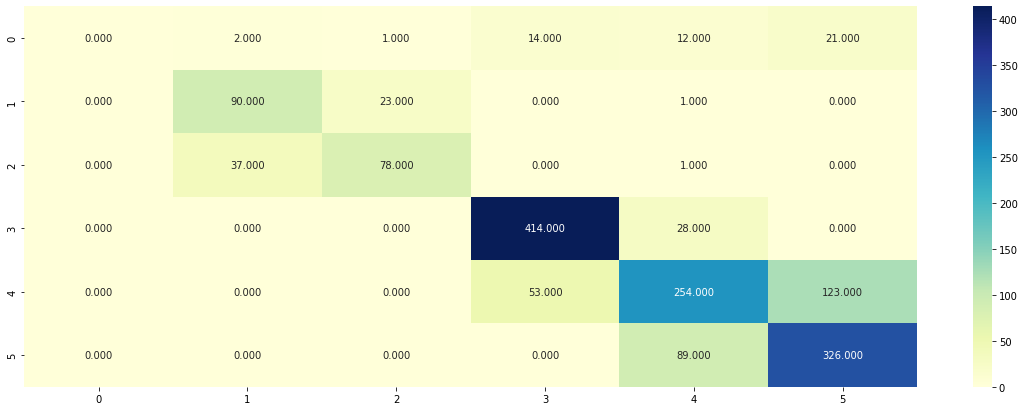

In [45]:
def plot_confusion_matrix(y_val,y_pred):
    plt.figure(figsize=(20,7))
    C = confusion_matrix(y_val, y_pred)
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f")
    
plot_confusion_matrix(y,y_pred)

In [46]:
#SVM
model2 = SVC()
model2.fit(X_train,y_train.values.ravel())
predictions_3 = model2.predict(X_val)
score_2 = f1_score(y_val,predictions_3,average='macro')
score_2

0.4137543976140674

In [47]:
accuracy_score(y_val, predictions_3)

0.5207402680280792

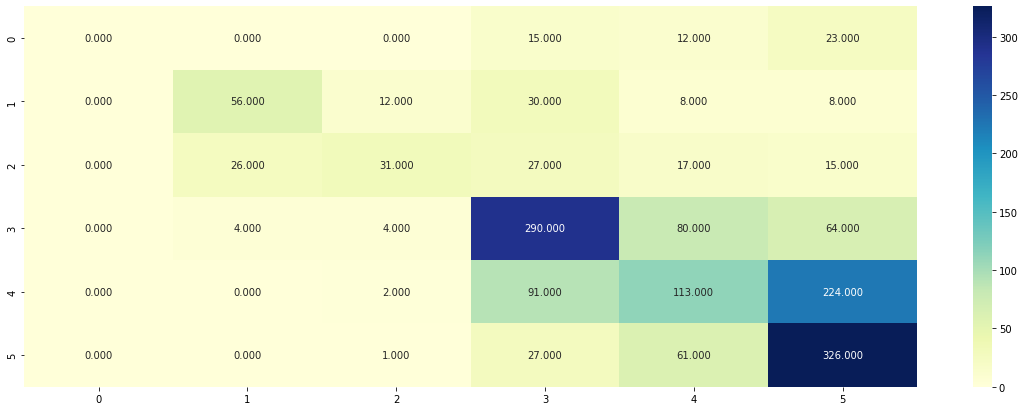

In [48]:
plot_confusion_matrix(y_val, predictions_3)

In [49]:
df_test.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,gender_code,region_category_code,membership_category_code,year,joined_through_referral_code,preferred_offer_types_code,medium_of_operation_code,internet_option_code,used_special_discount_code,offer_application_preference_code,past_complaint_code,complaint_status_code,feedback_code
0,50,12,386.26,40721.44,733.830000,0,2,4,6,1,2,3,2,1,0,0,1,2
1,41,11,37.80,9644.40,726.000000,1,2,1,5,1,2,2,0,1,0,0,1,3
2,31,18,215.36,3693.25,713.780000,0,1,5,4,1,1,1,1,1,0,1,3,0
3,64,50,44.57,36809.56,744.970000,1,1,5,4,2,0,0,0,1,0,1,0,7
4,16,6,349.88,40675.86,299.048351,0,1,2,6,2,2,3,1,0,1,1,3,3


In [50]:
test_df = sc.transform(df_test)
prediction = model1.predict(test_df)

In [52]:
import pickle
pickle.dump(model1,open('ML.pkl','wb'))
pickle.dump(model2,open('ML.pkl','wb'))

In [53]:
# print(model1.predict([ 24,16,32.42,37953.61,614.71,1,0,1,5,2,2,2,0,1,0,1,4,2]))

In [54]:
input_data=np.array([ 0,16,32.42,37953.61,14.71,1,0,1,5,2,2,2,0,1,0,1,4,2])
input_data = input_data.reshape(1,18)
final_input_data = sc.transform(input_data)
final_input_data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-2.3444442 ,  0.12187079, -0.52942463,  0.44108308, -3.53900745,
         0.98808223, -1.06720462, -0.72164055,  0.0104555 ,  1.02858976,
         1.23614865,  0.01043417, -1.22410838,  0.90784872, -1.11142196,
         1.00013443,  1.94277037, -0.42093324]])

In [55]:
prediction = model1.predict(final_input_data)
prediction

array([4])

In [56]:
## use loop to make it work 
#if(prediction < 3):
   #print('The customer will churn')
#else:
   #print('The customer will not  churn')

The customer will not  churn
